In [137]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.math import logical_not, logical_xor
import pylab
import numpy as np
from tensorflow.sparse import SparseTensor, to_dense, reorder
%matplotlib inline

tf.Tensor(b'It works!', shape=(), dtype=string)
You have version 2.3.0


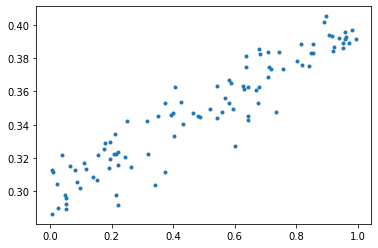

In [138]:
# PROBLEM 1
# Copied from 0_test_install.ipynb
hello = tf.constant('It works!')
print(hello)
print("You have version %s" % tf.__version__)

# create some data using numpy. y = x * 0.1 + 0.3 + noise
x_train = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_train))
y_train = x_train * 0.1 + 0.3 + noise

# plot it
pylab.plot(x_train, y_train, '.')

In [139]:
# PROBLEM 2
def xnor(x1, x2):
    '''Emulates XNOR gate, using tensorflow logical_not and logical_xor methods. Converts tensor result boolean. Returns boolean.'''
    return bool(logical_not(logical_xor(x1, x2)).numpy())

x1, x2 = tf.constant(False), tf.constant(False)
result = xnor(x1, x2)
print(result)


True


In [140]:
zero = tf.constant(0)
one = tf.constant(1)

# PROBLEM 3
def AND(x1, x2):
    w1 = tf.constant(20)
    w2 = tf.constant(20)
    b = tf.constant(-30)
    val = (w1 * x1 + w2 * x2) 
    return one if val + b > zero else zero

def OR(x1, x2):
    w1 = tf.constant(20)
    w2 = tf.constant(20)
    b = tf.constant(-10)
    val = (w1 * x1 + w2 * x2) 
    return one if val + b > zero else zero

def NOT(x1):
    w1 = tf.constant(-20)
    b = tf.constant(10)
    val = (w1 * x1) 
    return one if val + b > zero else zero

# Inputs
pair_inputs = [
    (one,one),
    (one,zero),
    (zero,one),
    (zero,zero)
]
single_inputs = [one,zero]

# Ouputs
and_output = [one,zero,zero,zero]
or_output = [one,one,one,zero]
not_output = [zero, one]

print('TESTING GATES')
print('AND')
for test_data in zip(pair_inputs, and_output):
    x1, x2 = test_data[0]
    print(f'Expected: {test_data[1]}, actual: {AND(x1,x2)}')

print('OR')
for test_data in zip(pair_inputs, or_output):
    x1, x2 = test_data[0]
    print(f'Expected: {test_data[1]}, actual: {OR(x1,x2)}')

print('NOT')
for test_data in zip(single_inputs, not_output):
    x1 = test_data[0]
    print(f'Expected: {test_data[1]}, actual: {NOT(x1)}')


TESTING GATES
AND
Expected: 1, actual: 1
Expected: 0, actual: 0
Expected: 0, actual: 0
Expected: 0, actual: 0
OR
Expected: 1, actual: 1
Expected: 1, actual: 1
Expected: 1, actual: 1
Expected: 0, actual: 0
NOT
Expected: 0, actual: 0
Expected: 1, actual: 1


In [141]:
# PROBLEM 4
def XOR(x1, x2):
    return one if (OR(x1, x2) and not AND(x1,x2)) else zero

def XNOR(x1, x2):
    return one if not XOR(x1, x2) else zero

xor_output = [zero, one, one, zero]
xnor_output = [one, zero, zero, one]

print('TESTING GATES')
print('XOR')
for test_data in zip(pair_inputs, xor_output):
    x1, x2 = test_data[0]
    print(f'Expected: {test_data[1]}, actual: {XOR(x1,x2)}')

print('XNOR')
for test_data in zip(pair_inputs, xnor_output):
    x1, x2 = test_data[0]
    print(f'Expected: {test_data[1]}, actual: {XNOR(x1,x2)}')

TESTING GATES
XOR
Expected: 0, actual: 0
Expected: 1, actual: 1
Expected: 1, actual: 1
Expected: 0, actual: 0
XNOR
Expected: 1, actual: 1
Expected: 0, actual: 0
Expected: 0, actual: 0
Expected: 1, actual: 1


In [142]:

seed = 42
# Generate 5 tuples of integers between 0-3
def getRandInt(minval, maxval):
    return tf.random.uniform(shape=(1,), minval=minval, maxval=maxval, dtype=tf.int32, seed=seed).numpy()[0]

indices = []
values = []
for i in range(5):
    row = getRandInt(0,4)
    col = getRandInt(0,4)
    index = [row,col]
    indices.append(index)
    
    val = getRandInt(1,11)
    values.append(val)
    
sparse_t = SparseTensor(indices=indices, values=values, dense_shape=(4,4))
dense_t = to_dense(reorder(sparse_tensor)).numpy()
print(dense_t)




[[0 3 0 0]
 [6 0 4 3]
 [0 0 0 0]
 [0 7 0 0]]


In [146]:
np.set_printoptions(edgeitems=100)
np.core.arrayprint._line_width = 600
filename = './auto-mpg.data'
mpg = np.genfromtxt(filename, usecols=range(0,8))
np.corrcoef(mpg, rowvar=False)

array([[ 1.        , -0.77539629, -0.80420282,         nan, -0.83174093,
         0.42028891,  0.57926713,  0.56345036],
       [-0.77539629,  1.        ,  0.95072139,         nan,  0.8960168 ,
        -0.50541949, -0.3487458 , -0.56254335],
       [-0.80420282,  0.95072139,  1.        ,         nan,  0.93282415,
        -0.54368408, -0.37016416, -0.6094094 ],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan],
       [-0.83174093,  0.8960168 ,  0.93282415,         nan,  1.        ,
        -0.41745732, -0.30656433, -0.58102391],
       [ 0.42028891, -0.50541949, -0.54368408,         nan, -0.41745732,
         1.        ,  0.28813695,  0.20587301],
       [ 0.57926713, -0.3487458 , -0.37016416,         nan, -0.30656433,
         0.28813695,  1.        ,  0.1806622 ],
       [ 0.56345036, -0.56254335, -0.6094094 ,         nan, -0.58102391,
         0.20587301,  0.1806622 ,  1.        ]])